#Download Dataset from Kaggle

In [ ]:
#install Kaggle
!pip install -q kaggle

In [ ]:
# Upload file Kaggle.json
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"daffariesmawan","key":"4a8d5beea95b66ce9eb28fd5aa9c276f"}'}

In [ ]:
#create a kaggle folder
! mkdir ~/.kaggle
#copc kaggle.json to folder created
! cp kaggle.json ~/.kaggle/
# permission for the json to act
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:09<00:00, 244MB/s]
100% 2.29G/2.29G [00:09<00:00, 248MB/s]


In [ ]:
!unzip chest-xray-pneumonia.zip

In [ ]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img

# Check isi konten tiap directory

In [ ]:
import os

base_dir = '/content/chest_xray'

print("Contents of base directory:")
print(os.listdir(base_dir))

print("\nContents of train directory:")
print(os.listdir(f'{base_dir}/train'))

print("\nContents of test directory:")
print(os.listdir(f'{base_dir}/test'))


print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}/val'))

Contents of base directory:
['train', '__MACOSX', 'val', 'chest_xray', 'test']

Contents of train directory:
['NORMAL', 'PNEUMONIA']

Contents of test directory:
['NORMAL', 'PNEUMONIA']

Contents of validation directory:
['NORMAL', 'PNEUMONIA']


In [ ]:
train_dir = "/content/chest_xray/train"
test_dir = "/content/chest_xray/test"
val_dir = "/content/chest_xray/val"

# Directory with training pictures
train_pneumonia_dir = os.path.join(train_dir, 'PNEUMONIA')
train_normal_dir = os.path.join(train_dir, 'NORMAL')

# Directory with testing pictures
test_pneumonia_dir = os.path.join(test_dir, 'PNEUMONIA')
test_normal_dir = os.path.join(test_dir, 'NORMAL')

# Directory with validation pictures
val_pneumonia_dir = os.path.join(val_dir, 'PNEUMONIA')
val_normal_dir = os.path.join(val_dir, 'NORMAL')

In [ ]:
train_pneumonia_fnames = os.listdir( train_pneumonia_dir )
train_normal_fnames = os.listdir( train_normal_dir )

print(train_pneumonia_fnames[:10])
print(train_normal_fnames[:10])

['person7_bacteria_25.jpeg', 'person508_virus_1020.jpeg', 'person465_bacteria_1977.jpeg', 'person809_bacteria_2717.jpeg', 'person1285_virus_2208.jpeg', 'person1018_virus_1706.jpeg', 'person1848_bacteria_4719.jpeg', 'person569_virus_1110.jpeg', 'person663_virus_1247.jpeg', 'person325_bacteria_1497.jpeg']
['IM-0555-0001-0001.jpeg', 'IM-0448-0001.jpeg', 'NORMAL2-IM-1096-0001.jpeg', 'IM-0355-0001.jpeg', 'IM-0554-0001.jpeg', 'IM-0439-0001-0002.jpeg', 'IM-0183-0001.jpeg', 'NORMAL2-IM-1112-0001.jpeg', 'NORMAL2-IM-0872-0001.jpeg', 'NORMAL2-IM-0554-0001.jpeg']


# Cek total jumlah dataset

In [ ]:
print("Total Train set:")
print("-"*40)
train_pneumonia = len(os.listdir(os.path.join(train_dir, 'PNEUMONIA')))
train_normal = len(os.listdir(os.path.join(train_dir, 'NORMAL')))
print(f"PNEUMONIA={train_pneumonia}")
print(f"NORMAL={train_normal}")

print("\nTotal Test set:")
print('-'*40)
test_pneumonia=len(os.listdir(os.path.join(test_dir, 'PNEUMONIA')))
test_normal=len(os.listdir(os.path.join(test_dir, 'NORMAL')))
print(f"PNEUMONIA={test_pneumonia}")
print(f"NORMAL={test_normal}")

print("\nTotal Validation set")
print('-'*40)
val_pneumonia=len(os.listdir(os.path.join(val_dir, 'PNEUMONIA')))
val_normal=len(os.listdir(os.path.join(val_dir, 'NORMAL')))
print(f"PNEUMONIA={val_pneumonia}")
print(f"NORMAL={val_normal}")

pneumonia = os.listdir("/content/chest_xray/train/PNEUMONIA")
pneumonia_dir = "/content/chest_xray/train/PNEUMONIA"

Total Train set:
----------------------------------------
PNEUMONIA=3875
NORMAL=1341

Total Test set:
----------------------------------------
PNEUMONIA=390
NORMAL=234

Total Validation set
----------------------------------------
PNEUMONIA=8
NORMAL=8


# Menampilkan beberpa dataset

In [ ]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters 4x4
nrows = 4
ncols = 4

pic_index = 0 # Index untuk iterasi tiap citra

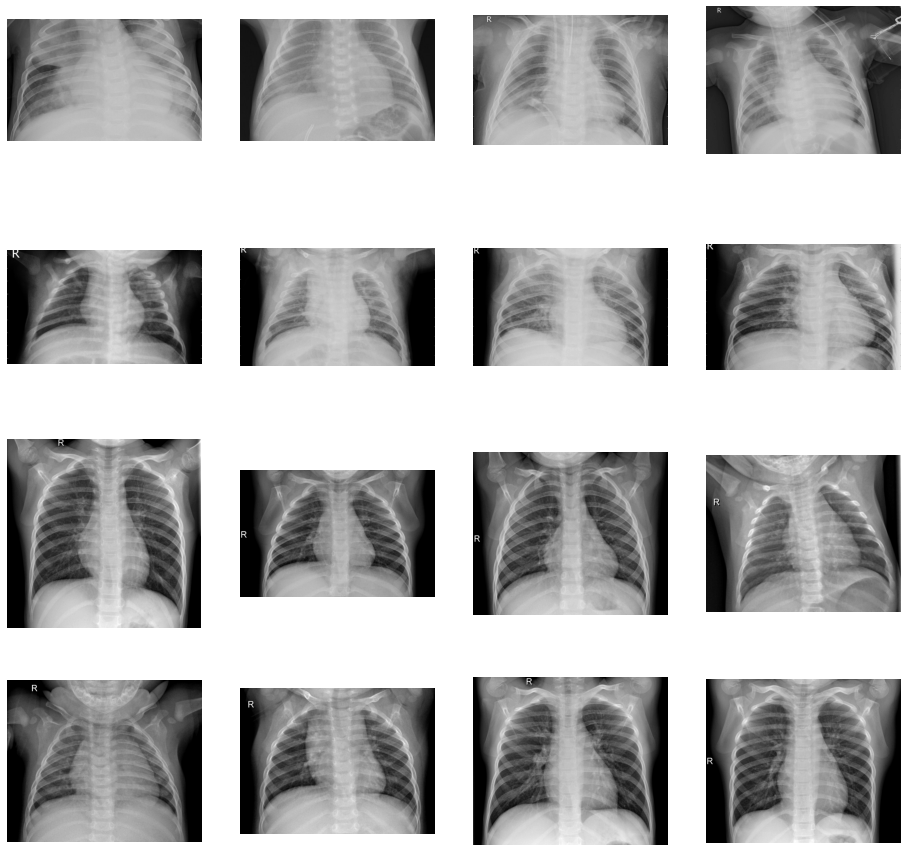

In [ ]:
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_pneumonia_pix = [os.path.join(train_pneumonia_dir, fname) 
                for fname in train_pneumonia_fnames[ pic_index-8:pic_index] 
               ]

next_normal_pix = [os.path.join(train_normal_dir, fname) 
                for fname in train_normal_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_pneumonia_pix+next_normal_pix):
    # set subplot dari 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') 
    img = mpimg.imread(img_path)
    plt.imshow(img, cmap='gray')

plt.show()


# Mendefinisikan Model dengan Tensorflow dan Keras API

In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 111, 111, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 54, 54, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 26, 26, 64)      

Konfigurasi spesifikasi untuk model training. Menggunakan Adam sebagai optimizer dan binary_crossentropy sebagai loss function

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics = ['accuracy'])

Menggunakan Callback untuk menghindari overfitting
- Menggunakan EarlyStopping untuk menghentikan training jika tidak ada peningkatan dalam 3 periode berturut-turut
- Menggunakan ReduceRL untuk mengurangi kecepatan learning rate saat metrik berhenti meningkat

In [ ]:
# Callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=1, mode='min')
lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',patience=2, verbose=2, mode='max')

# Data Preprocessing

In [ ]:
img_Datagen = ImageDataGenerator(
        rescale = 1/255,
        shear_range=0.2,
        zoom_range=0.3,
        horizontal_flip=True,
        vertical_flip=True,
        brightness_range=[0.5,2.0],
        width_shift_range = 0.2,
        rotation_range=20,
        fill_mode = 'nearest'
)
val_Datagen = ImageDataGenerator(
        rescale = 1./255
)

In [ ]:
train = img_Datagen.flow_from_directory(train_dir,
                                        target_size=(224,224),
                                        batch_size=32,
                                        class_mode='binary',
                                       )

test = val_Datagen.flow_from_directory(test_dir,
                                       target_size=(224,224),
                                       batch_size=32,
                                       class_mode='binary',
                                      )

validation = val_Datagen.flow_from_directory(val_dir,
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode='binary',
                                            )


Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


# Training 

In [ ]:
history = model.fit(train,epochs=15, 
                    validation_data=test,
                     steps_per_epoch=train.samples//32,
                    callbacks=[early_stopping,lr],
                    validation_steps=test.samples // 32)

Epoch 1/15
163/163 [==============================] - 127s 780ms/step - loss: 0.2918 - accuracy: 0.8677 - val_loss: 0.4096 - val_accuracy: 0.8388 - lr: 0.0010
Epoch 2/15
163/163 [==============================] - 127s 779ms/step - loss: 0.2674 - accuracy: 0.8785 - val_loss: 0.3394 - val_accuracy: 0.8602 - lr: 0.0010
Epoch 3/15
163/163 [==============================] - ETA: 0s - loss: 0.2622 - accuracy: 0.8884
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
163/163 [==============================] - 128s 783ms/step - loss: 0.2622 - accuracy: 0.8884 - val_loss: 0.3073 - val_accuracy: 0.8651 - lr: 0.0010
Epoch 4/15
163/163 [==============================] - 126s 774ms/step - loss: 0.2254 - accuracy: 0.9043 - val_loss: 0.2917 - val_accuracy: 0.8799 - lr: 1.0000e-04
Epoch 5/15
163/163 [==============================] - ETA: 0s - loss: 0.2218 - accuracy: 0.9105
Epoch 5: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
163/163 [================

# Implementasi Prediksi Model

In [ ]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # memprediksi citra
  path='/content/' + fn
  img=image.load_img(path, target_size=(224, 224))
  
  x=image.img_to_array(img)
  x /= 255
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=32)
  
  print(classes[0])
  
  if classes[0]>0.4:
    print(fn + " is Pneumonia lung")
  else:
    print(fn + " is Normal lung")

Saving 1024px-Chest_radiograph_in_influensa_and_H_influenzae,_posteroanterior,_annotated.jpg to 1024px-Chest_radiograph_in_influensa_and_H_influenzae,_posteroanterior,_annotated.jpg
[0.77677387]
1024px-Chest_radiograph_in_influensa_and_H_influenzae,_posteroanterior,_annotated.jpg is Pneumonia lung


# Representasi dari fitur CNN yang digunakan

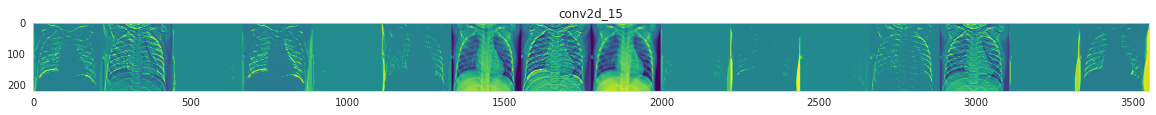

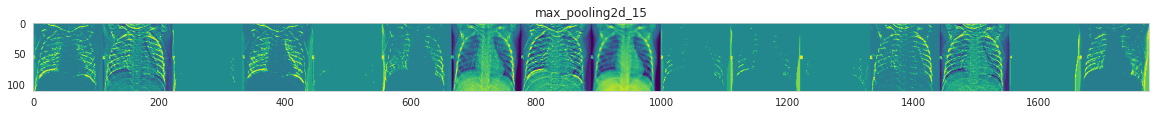

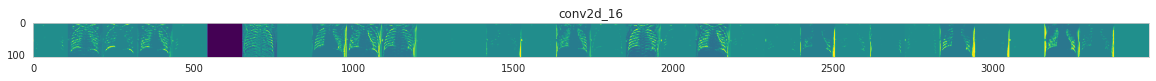

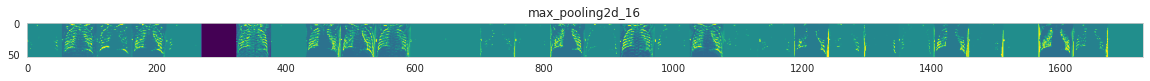

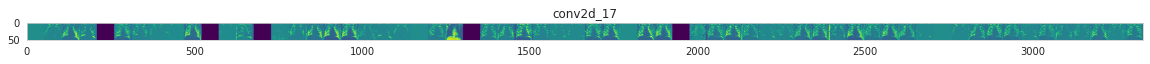

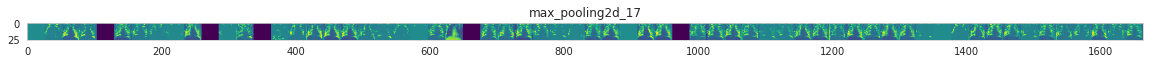

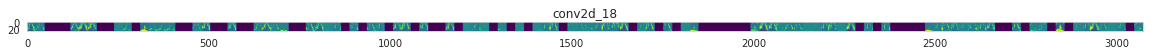

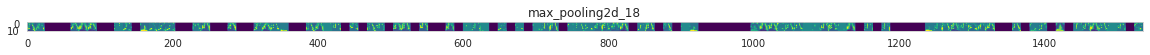

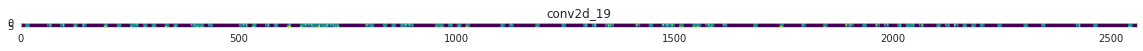

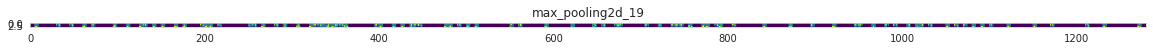

In [ ]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

successive_outputs = [layer.output for layer in model.layers]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# gunakan random input image dari dataset
pneumonia_img_files = [os.path.join(train_pneumonia_dir, f) for f in train_pneumonia_fnames]
normal_img_files = [os.path.join(train_normal_dir, f) for f in train_normal_fnames]
img_path = random.choice(pneumonia_img_files + normal_img_files)
img = load_img(img_path, target_size=(224, 224))  
x   = img_to_array(img)
x   = x.reshape((1,) + x.shape)
x /= 255.0

successive_feature_maps = visualization_model.predict(x)

layer_names = [layer.name for layer in model.layers]

# menampilkan fitur
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    n_features = feature_map.shape[-1]  
    size       = feature_map.shape[ 1]  
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x

    # Display grid
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

# Evaluasi Akurasi dan Loss 

Text(0.5, 1.0, 'Training and validation loss')

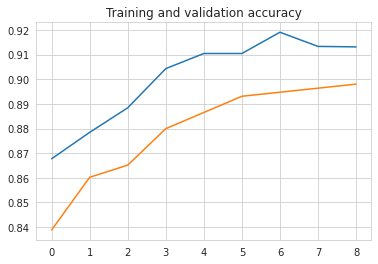

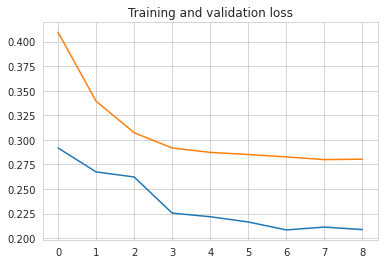

In [ ]:
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]
epochs   = range(len(acc)) 

# Plot training dan validation accuracy 
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

# Plot training dan validation loss 
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )